## Step 1: Business Problem
Problem Statement: The company needs to minimize credit losses by identifying loan applicants who are most likely to default.
Objective: Identify the factors that drive loan defaults, with a focus on applicants marked as "charged-off" .
Importance: Understanding these patterns allows the company to make better loan approval decisions, reduce risky loans, and improve overall profitability.

Place the loan.csv file in the location where the python file is running

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:",matplotlib.__version__)
print("seaborn version:", sns.__version__)

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Read Data from a file in local path
df = pd.read_csv(r"loan.csv")
# Displaying Rows and Columns count
df.shape

pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.8.4
seaborn version: 0.13.2


(39717, 111)

In [2]:
#Check na value count for each column in descending order
df.isnull().sum().sort_values(ascending = False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


#### Step 2: Data Preparation and Cleaning
Goal: Prepare the data for analysis by cleaning missing values, treating outliers, and converting data types where necessary. 
Actions: Handle missing values: Either drop these or use imputation techniques if they are important for analysis. 
Convert data: Convert necessary columns to data types as required 

In [3]:
null_only_columns = df.columns[df.isnull().all()]
null_only_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [4]:
# Drop columns with only NULL values. This will cover both null and na values
df = df.drop(columns=null_only_columns)

df.shape

(39717, 57)

In [5]:
# Clean further and replace whitespace-only strings with NaN so that they can be cleaned
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Calculate row count for 40 percent 
rows_count_percentage = (df.shape[0]) * 0.4

# Check if columns has na or null values greater than or equal to above record count, if so ,delete that column
for c in df.columns:
   v = df[c].isnull().sum()
   if v >= rows_count_percentage:
      df.drop(c, axis = 1, inplace = True)
df.shape

(39717, 54)

In [6]:
# Cleaning columns for symbols
clean_columns_per_symbol = ['revol_util', 'int_rate']

# Remove percentage symbol and convert them into float type
for c in clean_columns_per_symbol:
   df[c] = df[c].str.rstrip('%').astype('float') 

# Removing string months from term and convert into int type
df['term'] = df['term'].str.rstrip('months').astype('int64') 

#Removing columns which has values as 0 for most of the rows
col_with_zero_values_only = ["chargeoff_within_12_mths","delinq_amnt"]
df.drop(col_with_zero_values_only, axis=1, inplace=True)

df.shape

(39717, 52)

In [7]:
# Printing column type of remaining columns to check if any conversions needed before replacing na values
for c in df.columns:
   print(c, df[c].dtype)

id int64
member_id int64
loan_amnt int64
funded_amnt int64
funded_amnt_inv float64
term int64
int_rate float64
installment float64
grade object
sub_grade object
emp_title object
emp_length object
home_ownership object
annual_inc float64
verification_status object
issue_d object
loan_status object
pymnt_plan object
url object
desc object
purpose object
title object
zip_code object
addr_state object
dti float64
delinq_2yrs int64
earliest_cr_line object
inq_last_6mths int64
open_acc int64
pub_rec int64
revol_bal int64
revol_util float64
total_acc int64
initial_list_status object
out_prncp float64
out_prncp_inv float64
total_pymnt float64
total_pymnt_inv float64
total_rec_prncp float64
total_rec_int float64
total_rec_late_fee float64
recoveries float64
collection_recovery_fee float64
last_pymnt_d object
last_pymnt_amnt float64
last_credit_pull_d object
collections_12_mths_ex_med float64
policy_code int64
application_type object
acc_now_delinq int64
pub_rec_bankruptcies float64
tax_liens fl

In [8]:
# Fill na columns wiith median for int, float and mode for object
int_columns = df.select_dtypes(include='int64')
for c in int_columns:
   #print(df[c].isna().sum())
   #print(df[c].median())
   df[c].fillna(df[c].median(), inplace= True)

float_columns = df.select_dtypes(include='float64')
for c in float_columns:
   #print(df[c].isna().sum())
   #print(df[c].median())
   df[c].fillna(df[c].median(), inplace= True)

obj_columns = df.select_dtypes(include='object')
for c in obj_columns:
   if(c != "desc") :
      df[c].fillna(df[c].mode()[0], inplace= True)

## Filling Desc with Unknown instead of mode
df['desc'].fillna('Unknown', inplace=True)

In [9]:
# Check if any na values are present
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

In [10]:
# Remove Duplicate data
df = df.drop_duplicates()

In [11]:
## As it is loan data and we are trying to analyze the driving factors behind default we are removing only outliers on very specific columns

col_for_ana_outlier_removal = ['loan_amnt', 'int_rate', 'annual_inc']

print("Before Outlier Removal ", df.shape)
for c in col_for_ana_outlier_removal:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    tf = df[(df[c] < lower_bound) | (df[c] > upper_bound)]
    print("Removed Rows for ", c, tf.shape[0])
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]

print("After Outlier Removal ", df.shape)

Before Outlier Removal  (39717, 52)
Removed Rows for  loan_amnt 1230
Removed Rows for  int_rate 76
Removed Rows for  annual_inc 1704
After Outlier Removal  (36707, 52)


In [12]:
# Dividing Interest rate into bins to  use in segmented analysis
bins = np.arange(0,26,6)
df['int_rate_bin'] = pd.cut(df['int_rate'], bins=bins)
df[['int_rate_bin', 'int_rate']].head()

,int_rate_bin,int_rate
0,"(6, 12]",10.65
1,"(12, 18]",15.27
2,"(12, 18]",15.96
3,"(12, 18]",13.49
4,"(12, 18]",12.69


In [13]:
# Get different types of loan status and their counts
df['loan_status'].value_counts()

loan_status
Fully Paid     30593
Charged Off     5172
Current          942
Name: count, dtype: int64

#Step 3 Univariate Analysis

Goal: Explore individual variables to understand their distribution and check for trends that might indicate default risk.

Actions: Use a histplot/boxplot for numerical, countplot/box plot  for categorical type of columns.

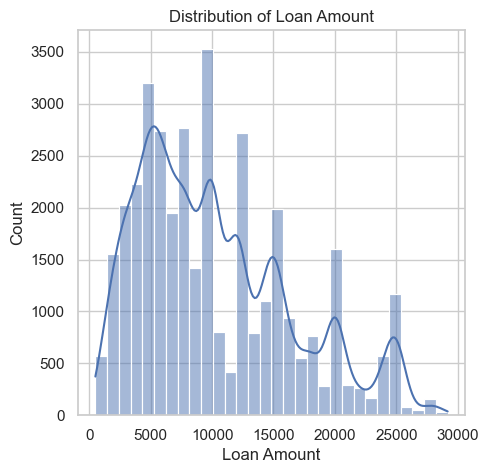

In [14]:
sns.set(style="whitegrid")
 
# Histogram for Loan Amount 
plt.figure(figsize=(5, 5))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

From the above data, the loan amounts are right-skewed, with the most common loan amounts between 5000 and 15000

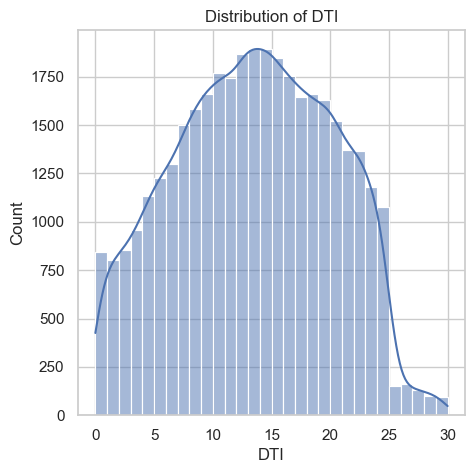

In [15]:
# 2. Histogram for Debt-to-Income
plt.figure(figsize=(5, 5))
sns.histplot(df['dti'], bins=30, kde=True)
plt.title('Distribution of DTI')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.show()

From the above graph the DTI distribution is slightly right-skewed, with most borrowers having a DTI between 8 and 25

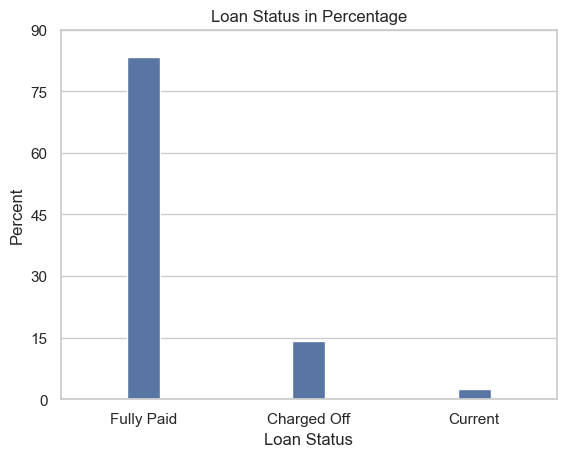

loan_status
Fully Paid     83.343776
Charged Off    14.089956
Current         2.566268
Name: count, dtype: float64


In [16]:
# Create the countplot for loan_staus
sns.countplot(data=df, x ='loan_status', stat = "percent",width=0.2) 
# Show the plot
plt.xlabel("Loan Status")
plt.ylabel("Percent")
plt.yticks(ticks=range(0, 100, 15))
plt.title('Loan Status in Percentage')
plt.show()
print(df.loan_status.value_counts() * 100/df.shape[0])

From the above data, about 83.5 percent of loans have been fully-paid, 14 percent are charged off loans and about 2.5 percent are current loans

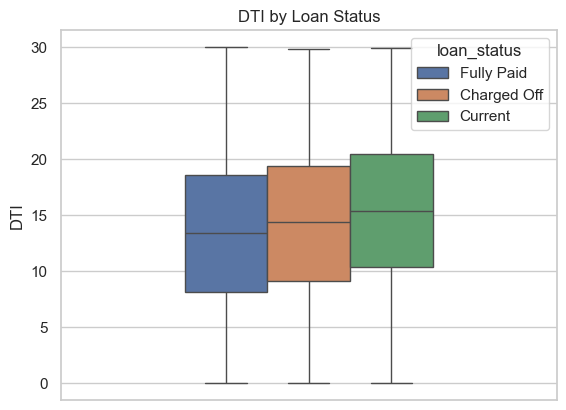

In [17]:
# Create the boxplot for dti
sns.boxplot(data=df, y="dti", hue ='loan_status', width=0.5) 
# Show the plot
plt.ylabel("DTI")
plt.title('DTI by Loan Status')
plt.show()

From the above data, the median DTI for Current Loans > Charged off Loans > Fully-Paid Loans

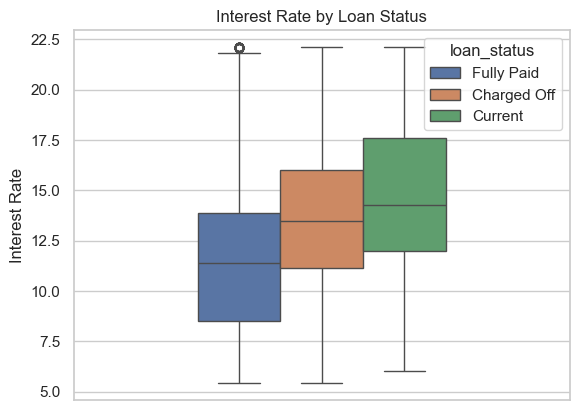

In [18]:
# Create the boxplot for int_rate
sns.boxplot(data=df, y="int_rate", hue ='loan_status', width=0.5) 
# Show the plot
plt.ylabel("Interest Rate")
plt.title('Interest Rate by Loan Status')
plt.show()

From the above data, the median Interest Rate for Current Loans > Charged off Loans > Fully-Paid Loans

<Axes: xlabel='grade', ylabel='percent'>

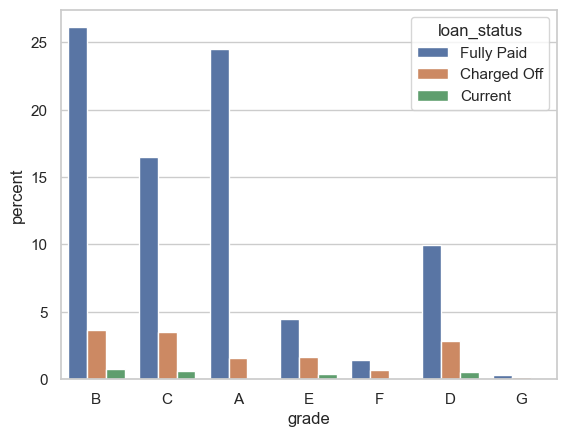

In [19]:
sns.countplot(df, x = "grade", hue = "loan_status", stat = "percent")

From the above data :
1. Most of the fully paid loans are in B,A,C,D grades in the mentioned order. 
2. Most of the charged off loans are in B,C,D grades in the mentioned order.
3. Most of the current loans are in B,C,D,E grades in the mentioned order.

In [20]:
# Considering only charged off loans as analysis is only for those type of loans
df_charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Rows of Charged off loans only 
df_charged_off_loans.shape

(5172, 53)

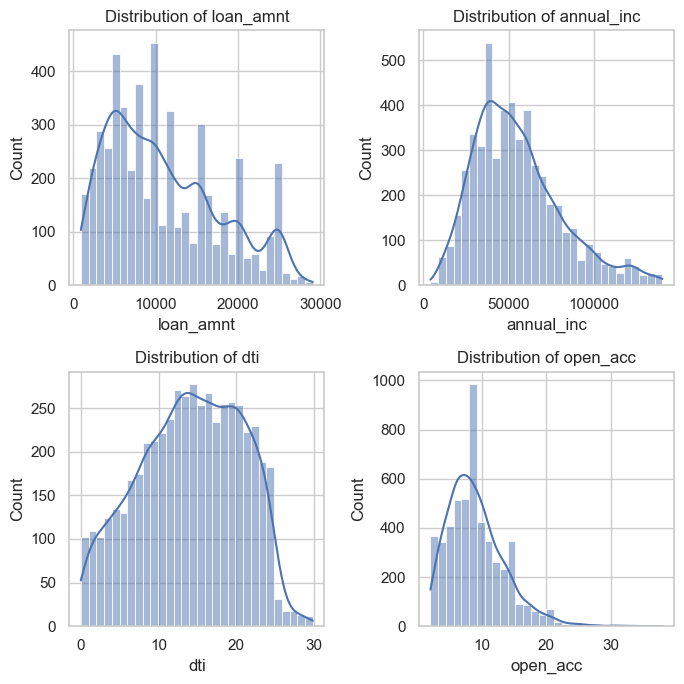

In [21]:
# Set the plot style for better visuals
# Create hist plots for numerical columns
sns.set(style="whitegrid")

# List of numerical columns based on the dataset preview
numerical_columns = ['loan_amnt', 'annual_inc','dti', 'open_acc']

# Create histograms for numerical columns
def plot_numerical_columns(df, numerical_columns):
    plt.figure(figsize=(7, 7))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

# Plotting the numerical columns
plot_numerical_columns(df_charged_off_loans, numerical_columns)

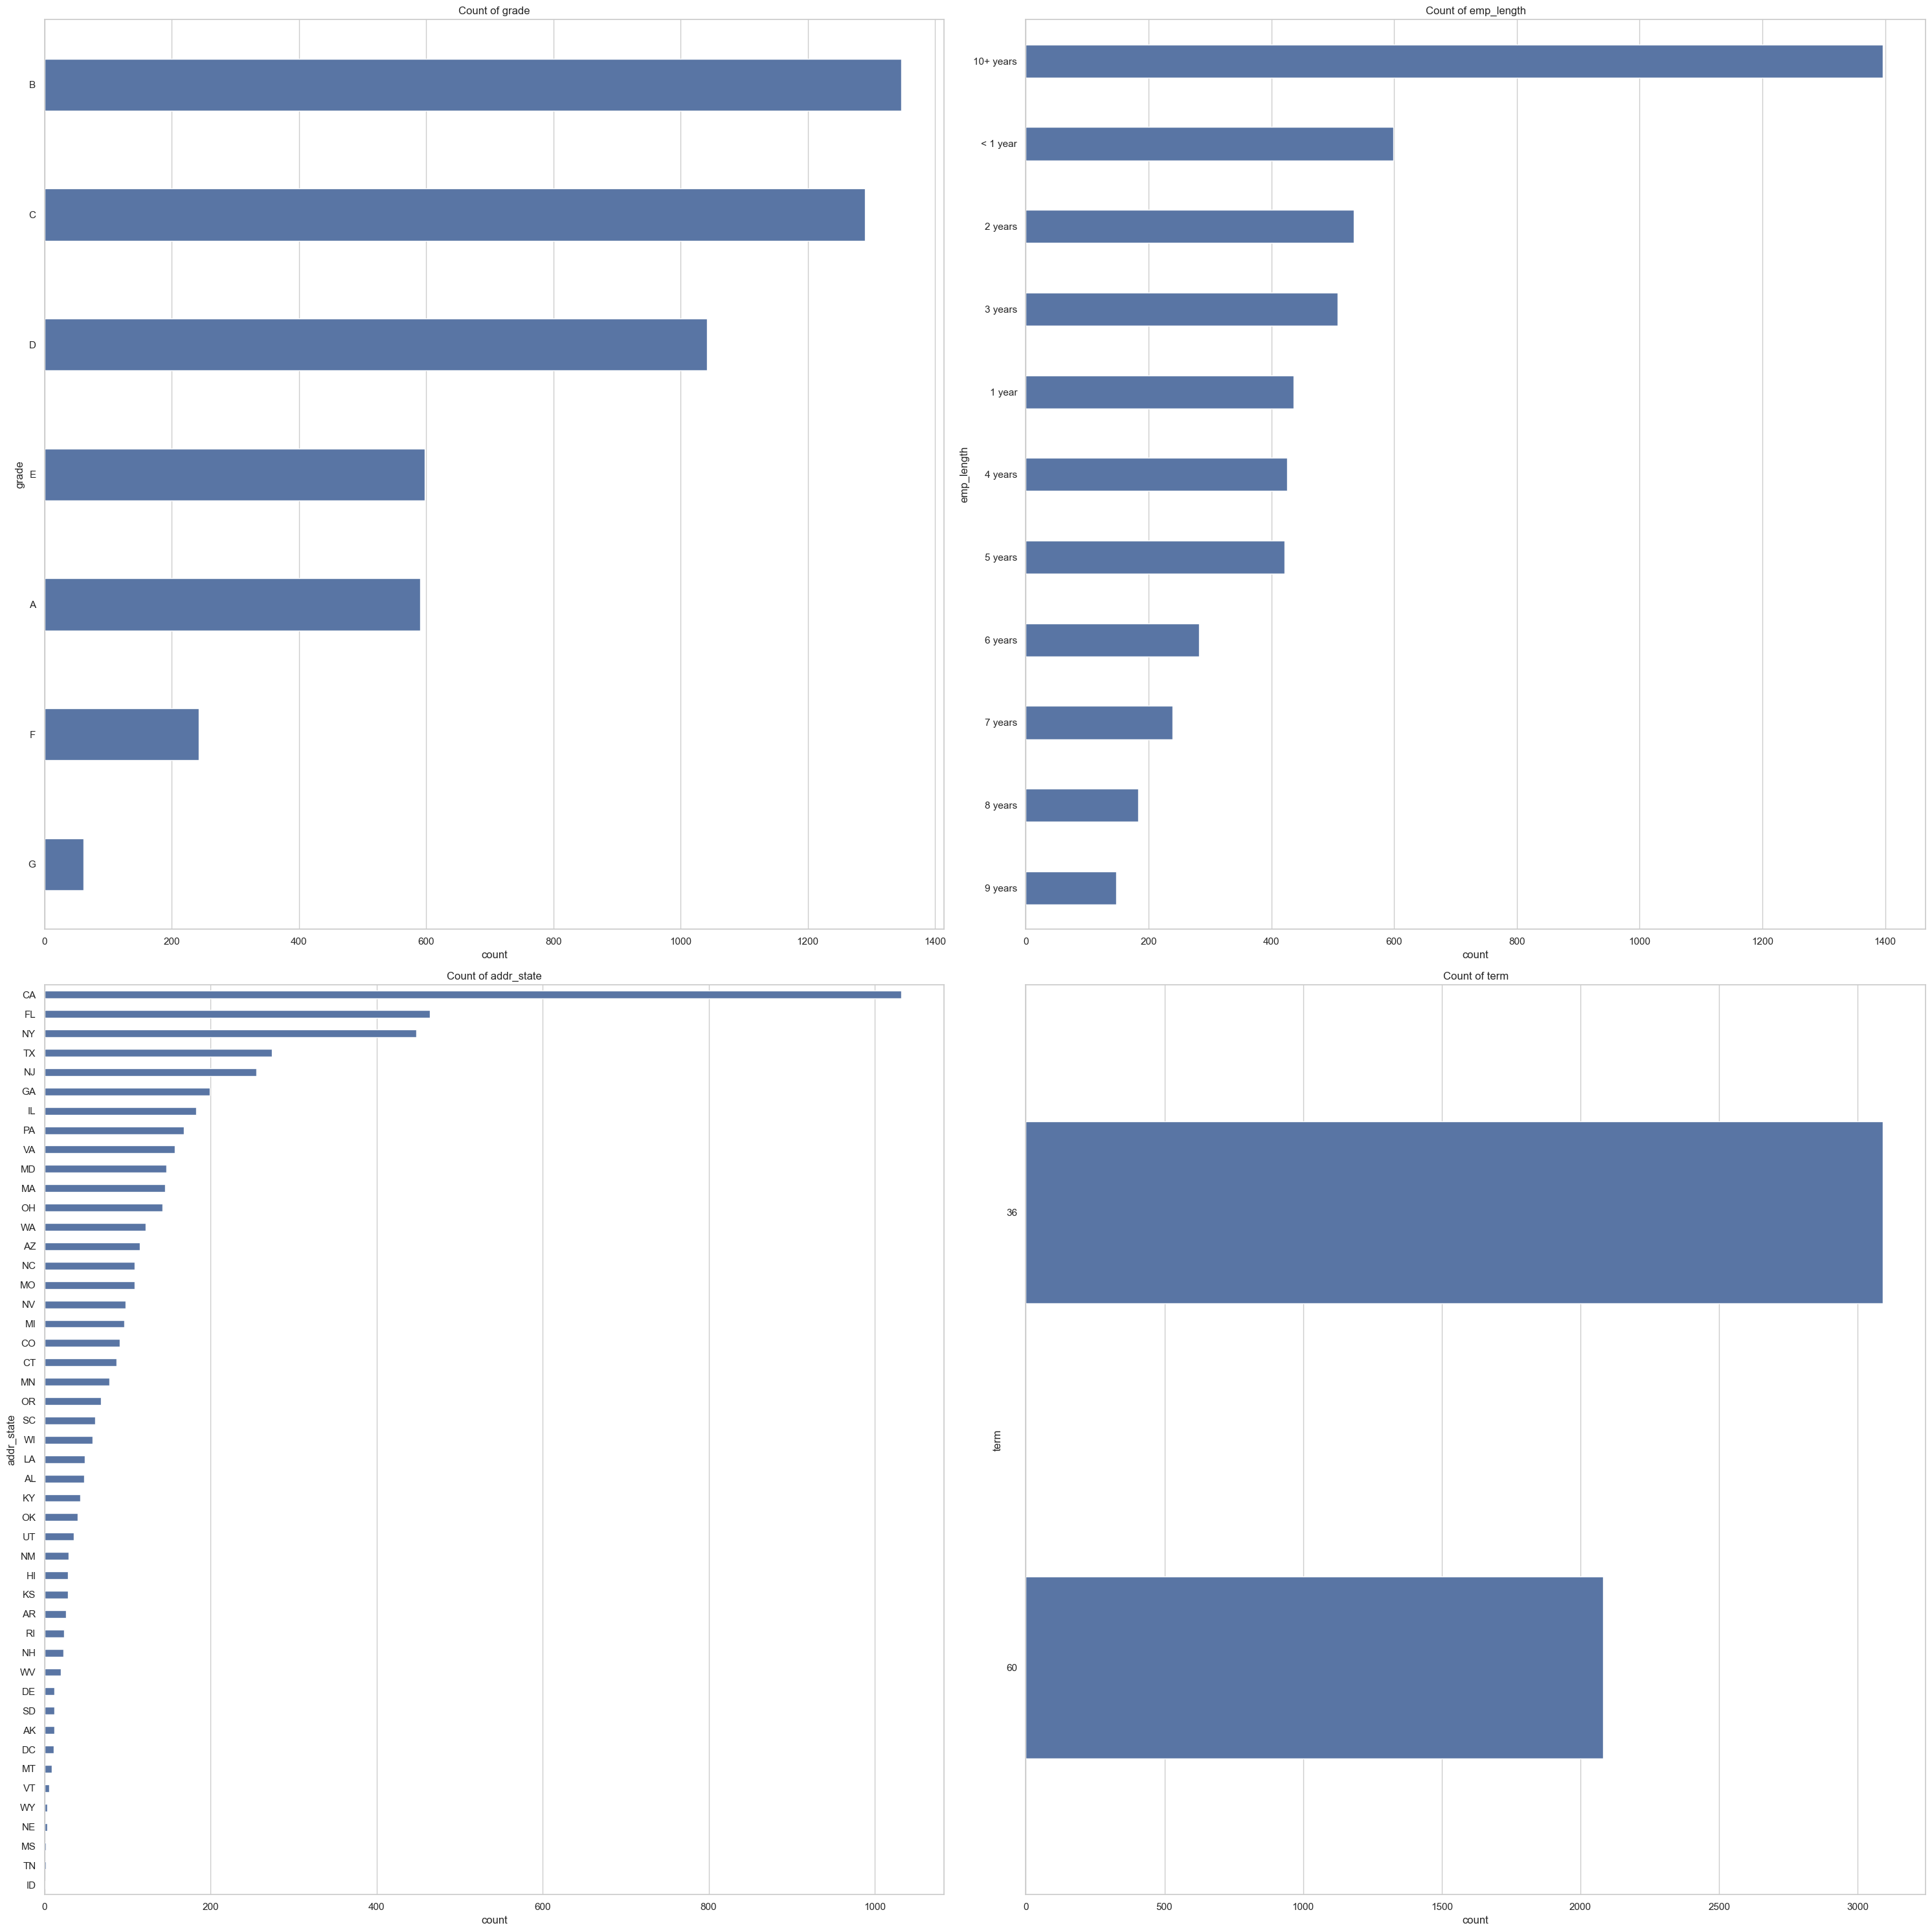

In [22]:
# Create count plots for categorical columns
def plot_categorical_columns(df, categorical_columns):
    plt.figure(figsize=(30, 30))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(y=df[column].dropna(), order=df[column].value_counts().index, width = 0.4)
        plt.title(f'Count of {column}')
    plt.tight_layout()
    plt.show()

categorical_columns = ['grade', 'emp_length', 'addr_state', 'term']

# Plotting the categorical columns
plot_categorical_columns(df_charged_off_loans, categorical_columns)

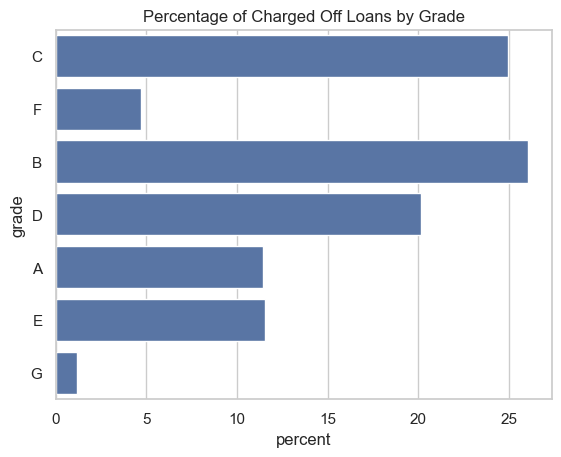

Percentage of Charged Off Loans Count by Grade
grade
B    26.044084
C    24.941995
D    20.146945
E    11.562258
A    11.426914
F     4.698376
G     1.179428
Name: count, dtype: float64


In [23]:
sns.countplot(df_charged_off_loans["grade"], stat = "percent")
plt.title("Percentage of Charged Off Loans by Grade")
plt.show()
# Percentage of charged off loans for different grades
print("Percentage of Charged Off Loans Count by Grade")
print(df_charged_off_loans.grade.value_counts()  * 100 /df_charged_off_loans.shape[0])

From the above data and calculation, 70% of the charged off loans have B,C,D grades in the respective order.

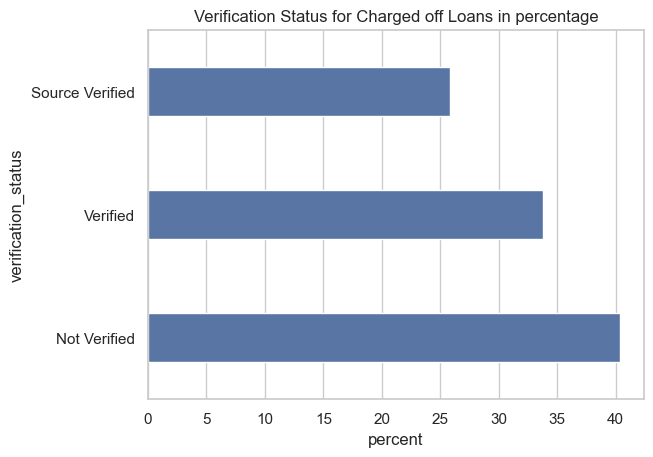

Verification Status for Charged off loans in Percentage
verification_status
Not Verified       40.390565
Verified           33.778036
Source Verified    25.831400
Name: count, dtype: float64


In [24]:
# Verification Status for Charged-Off Loans
sns.countplot(df_charged_off_loans["verification_status"], stat = "percent", width = 0.4)
plt.title("Verification Status for Charged off Loans in percentage")
plt.show()

print("Verification Status for Charged off loans in Percentage")
print(df_charged_off_loans.verification_status.value_counts() * 100/df_charged_off_loans.shape[0])

From the above data and calculation, 40% of the charged off loans are not verified.

In [25]:
df_charged_off_loans["home_ownership"].value_counts()* 100/df_charged_off_loans.shape[0]

home_ownership
RENT        52.010828
MORTGAGE    39.597834
OWN          8.062645
OTHER        0.328693
Name: count, dtype: float64

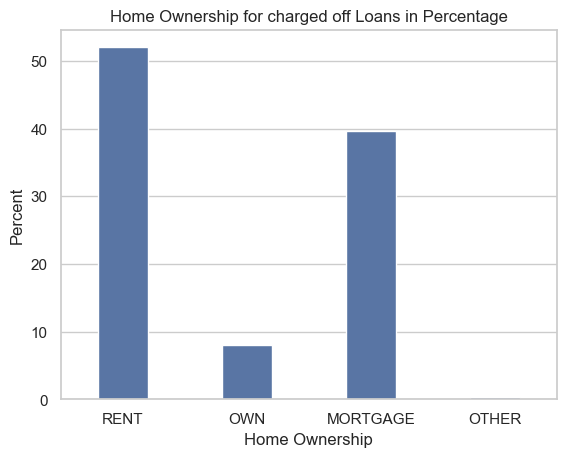

home_ownership
RENT        52.010828
MORTGAGE    39.597834
OWN          8.062645
OTHER        0.328693
Name: count, dtype: float64


In [26]:
# Create the countplot
sns.countplot(data=df_charged_off_loans, x ='home_ownership', stat = "percent", width = 0.4) 

# Show the plot
plt.xlabel("Home Ownership")
plt.ylabel("Percent")
plt.title('Home Ownership for charged off Loans in Percentage')
plt.show()
print(df_charged_off_loans.home_ownership.value_counts() * 100/df_charged_off_loans.shape[0])

From the above data and calculation, 52% of the charged off loans have ownership as RENT.

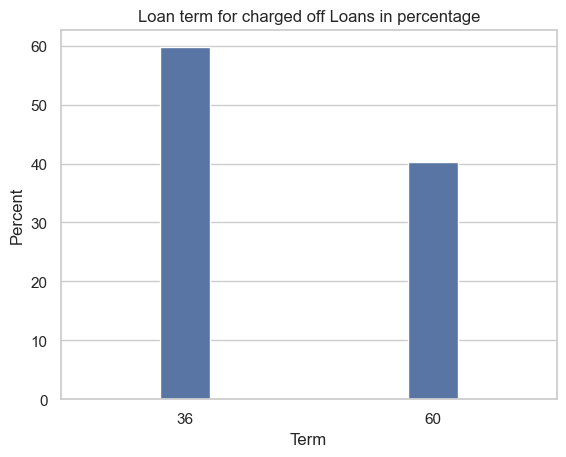

term
36    59.74478
60    40.25522
Name: count, dtype: float64


In [27]:
# Create the countplot
sns.countplot(data=df_charged_off_loans, x ='term', stat = "percent", width = 0.2) 

# Show the plot
plt.xlabel("Term")
plt.ylabel("Percent")
plt.title('Loan term for charged off Loans in percentage')
plt.show()
print(df_charged_off_loans.term.value_counts() * 100/df_charged_off_loans.shape[0])

From the above data and calculation, about 60% of the charged off loans have 36 months as term.

addr_state
CA    19.953596
FL     8.971384
NY     8.662026
TX     5.297757
NJ     4.930394
GA     3.847641
IL     3.538283
PA     3.248260
VA     3.035576
MD     2.842227
MA     2.803558
OH     2.745553
WA     2.358855
AZ     2.223511
NC     2.107502
MO     2.107502
NV     1.894818
MI     1.856148
CO     1.759474
CT     1.682135
MN     1.508121
OR     1.314772
SC     1.179428
WI     1.121423
LA     0.947409
AL     0.928074
KY     0.831400
OK     0.773395
UT     0.676721
NM     0.560712
HI     0.541377
KS     0.541377
AR     0.502707
RI     0.464037
NH     0.444702
WV     0.386698
DE     0.232019
SD     0.232019
AK     0.232019
DC     0.212684
MT     0.174014
VT     0.116009
WY     0.058005
NE     0.058005
MS     0.038670
TN     0.038670
ID     0.019335
Name: count, dtype: float64


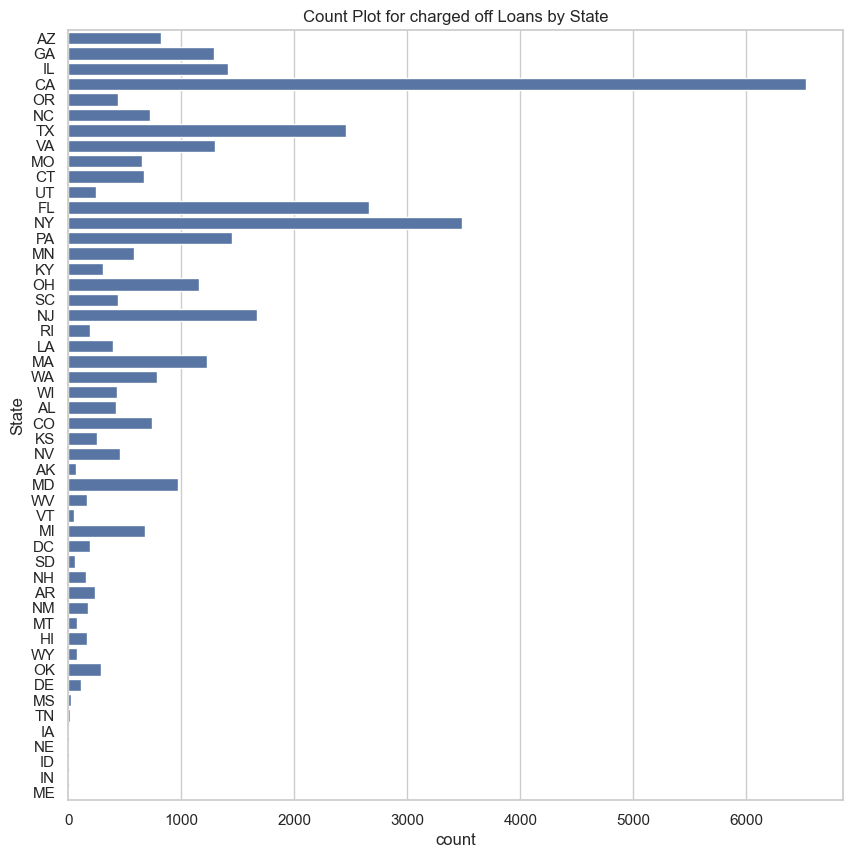

In [28]:
print(df_charged_off_loans.addr_state.value_counts() * 100/df_charged_off_loans.shape[0])

plt.figure(figsize=(10, 10))

# Create the countplot
sns.countplot(y='addr_state', data=df)  # Set 'y' to plot vertically

# Show the plot
plt.ylabel("State")
plt.title('Count Plot for charged off Loans by State')
plt.show()

Most of the charged off loan have originated in CA state, followed by NY, FL and TX.

In [29]:
# Percentage of charged off loans by loan purpose
print(df_charged_off_loans.purpose.value_counts() * 100/df_charged_off_loans.shape[0])

purpose
debt_consolidation    48.820572
other                 11.407579
credit_card            9.648105
small_business         8.043310
home_improvement       6.051817
major_purchase         4.156999
car                    3.054911
medical                1.972158
moving                 1.740139
wedding                1.740139
educational            1.044084
vacation               1.005414
house                  0.986079
renewable_energy       0.328693
Name: count, dtype: float64


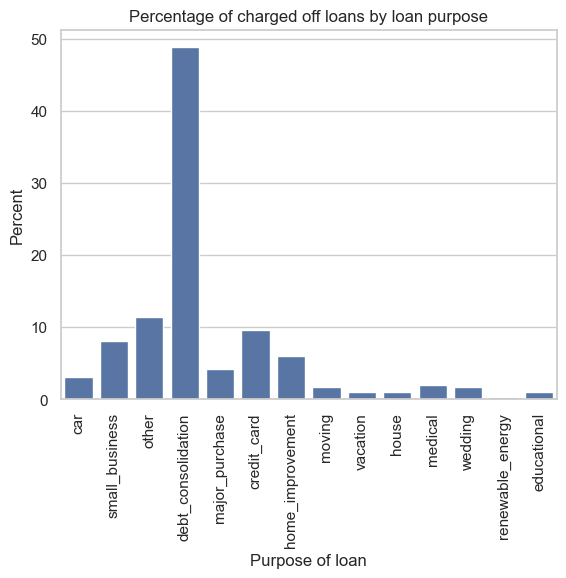

purpose
debt_consolidation    48.820572
other                 11.407579
credit_card            9.648105
small_business         8.043310
home_improvement       6.051817
major_purchase         4.156999
car                    3.054911
medical                1.972158
moving                 1.740139
wedding                1.740139
educational            1.044084
vacation               1.005414
house                  0.986079
renewable_energy       0.328693
Name: count, dtype: float64


In [30]:
sns.countplot(x = "purpose", data=df_charged_off_loans , stat= "percent")
plt.xticks(rotation=90)
plt.xlabel('Purpose of loan')
plt.ylabel('Percent')
plt.title("Percentage of charged off loans by loan purpose")
plt.show()
print(df_charged_off_loans.purpose.value_counts() * 100/df_charged_off_loans.shape[0])

The purpose of the 48 percent of charged off loans is for debt consolidation.

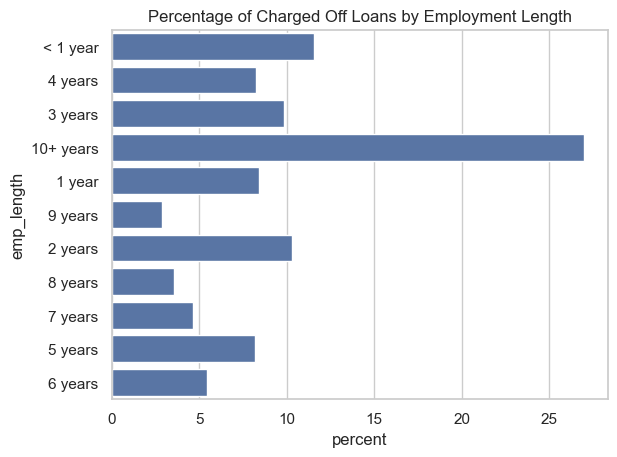

Percentage of Charged Off Loans Count by Grade
emp_length
10+ years    26.991493
< 1 year     11.581593
2 years      10.324826
3 years       9.822119
1 year        8.430008
4 years       8.236659
5 years       8.159319
6 years       5.452436
7 years       4.621036
8 years       3.538283
9 years       2.842227
Name: count, dtype: float64


In [31]:
# Count plot of emp length for charged off loans
sns.countplot(df_charged_off_loans["emp_length"], stat = "percent")
plt.title("Percentage of Charged Off Loans by Employment Length")
plt.show()
# Percentage of charged off loans for different grades
print("Percentage of Charged Off Loans Count by Grade")
print(df_charged_off_loans.emp_length.value_counts()  * 100 /df_charged_off_loans.shape[0])

Most of the charged off loans are defaulted by emplyees whose tenure is more than 10 years.

In [32]:
##Segmented Univariate Analysis by finding Annual Income group and Loan Income Group and then  plotting the count for them

In [33]:
df_charged_off_loans['annual_inc'].describe()

count      5172.000000
mean      55022.655164
std       25870.339342
min        4080.000000
25%       36000.000000
50%       50000.000000
75%       69997.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [34]:
# Function to group Annual Income into various ranges
def find_income_group(val):
    group = "unknown"
    if val <= 50000:
       group = "<=50000"
    elif val > 50000 and val <= 75000:
       group = ">50000 And <=75000"
    elif val > 75000 and val <= 100000:
       group = ">75000 And <=100000"
    else:
       group = ">100000"
    return group

# Create a new dataframe column to which indicates the group of annual income
df_charged_off_loans["annual_inc_grp"] = df_charged_off_loans['annual_inc'].apply(find_income_group)

In [35]:
# Finding Count and Percentage of Each group in terms of default loans
group_annul_inc = df_charged_off_loans.groupby('annual_inc_grp').size().reset_index(name='Count')

group_annul_inc['Percentage'] = (group_annul_inc['Count'] / df_charged_off_loans.shape[0]) * 100

print(group_annul_inc)

        annual_inc_grp  Count  Percentage
0              <=50000   2603   50.328693
1              >100000    318    6.148492
2   >50000 And <=75000   1604   31.013148
3  >75000 And <=100000    647   12.509667


80% of the charged off loans were taken by people whose Annual Income less than or equal to 75000.

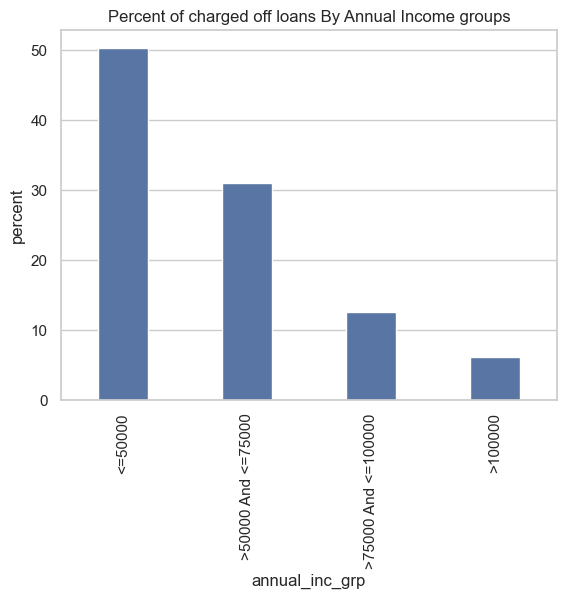

        annual_inc_grp  Count  Percentage
0              <=50000   2603   50.328693
1              >100000    318    6.148492
2   >50000 And <=75000   1604   31.013148
3  >75000 And <=100000    647   12.509667


In [36]:
inc_grp_order = ["<=50000",">50000 And <=75000",">75000 And <=100000",">100000"]
sns.countplot(x = "annual_inc_grp", data=df_charged_off_loans, stat = "percent", order = inc_grp_order, width = 0.4)
plt.xticks(rotation=90)
plt.title("Percent of charged off loans By Annual Income groups")
plt.show()

## Printing percentage
print(group_annul_inc)

In [37]:
# Function to group Loan Amount into various ranges
def find_loan_group(val):
    group = "unknown"
    if val <= 5000:
       group = "<=5000"
    elif val > 5000 and val <= 10000:
       group = ">5000 And <=10000"
    elif val > 10000 and val <= 15000:
       group = ">10000 And <=15000"
    elif val > 15000 and val <= 20000:
       group = ">15000 And <=20000"
    elif val > 20000 and val <= 25000:
       group = ">20000 And <=25000"
    else:
       group = ">25000"
    return group

# Create a new dataframe column to which indicates the group of annual income
df_charged_off_loans["loan_grp"] = df_charged_off_loans['loan_amnt'].apply(find_loan_group)



In [38]:
# Finding Count and Percentage of Each group in terms of default loans
group_loan = df_charged_off_loans.groupby('loan_grp').size().reset_index(name='Count')

group_loan['Percentage'] = (group_loan['Count'] / df_charged_off_loans.shape[0]) * 100

print(group_loan)

             loan_grp  Count  Percentage
0              <=5000   1298   25.096674
1  >10000 And <=15000   1015   19.624903
2  >15000 And <=20000    715   13.824439
3  >20000 And <=25000    478    9.242073
4              >25000     61    1.179428
5   >5000 And <=10000   1605   31.032483


Most of the loans that have been defaulted have loan amounts between 5000 and 10000, which is followed by the range 0 to 5000 , and then between 10000 and 15000.

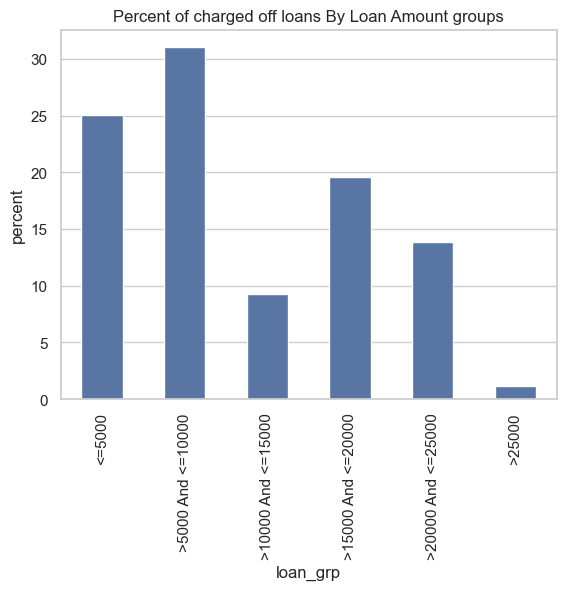

             loan_grp  Count  Percentage
0              <=5000   1298   25.096674
1  >10000 And <=15000   1015   19.624903
2  >15000 And <=20000    715   13.824439
3  >20000 And <=25000    478    9.242073
4              >25000     61    1.179428
5   >5000 And <=10000   1605   31.032483


In [39]:
loan_grp_order = ["<=5000",">5000 And <=10000",">10000 And <=15000",">15000 And <=20000",">20000 And <=25000",">25000"]
sns.countplot(x = "loan_grp", data=df_charged_off_loans, stat = "percent", width = 0.5)
plt.xticks(ticks=range(len(loan_grp_order)), labels=loan_grp_order, rotation=90)
plt.title("Percent of charged off loans By Loan Amount groups")
plt.show()
print(group_loan)

In [40]:
# Bi Variate Analysis
pv = pd.pivot_table(df_charged_off_loans, values = "annual_inc" , index=["grade","verification_status"], aggfunc = 'count')
print(pv)


                           annual_inc
grade verification_status            
A     Not Verified                312
      Source Verified             138
      Verified                    141
B     Not Verified                604
      Source Verified             342
      Verified                    401
C     Not Verified                579
      Source Verified             301
      Verified                    410
D     Not Verified                397
      Source Verified             296
      Verified                    349
E     Not Verified                143
      Source Verified             167
      Verified                    288
F     Not Verified                 41
      Source Verified              74
      Verified                    128
G     Not Verified                 13
      Source Verified              18
      Verified                     30


## BiVariate Analysis 

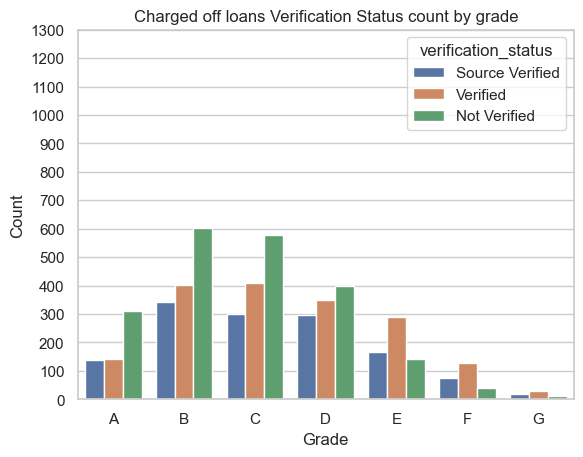

In [41]:
#BiVariate Analysis  - Grade vs Verification Status
grade_values = np.sort(df_charged_off_loans.grade.unique())
sns.countplot(df_charged_off_loans, x = "grade", hue = "verification_status", order = grade_values)
plt.yticks(np.arange(0, df_charged_off_loans['grade'].value_counts().max(), 100))
#plt.yticks(np.arange(0, 20, 2.5))
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title("Charged off loans Verification Status count by grade")
plt.show()


In [42]:
# Finding which sub_grade loans are more in each grade of charged off loans
df_charged_off_loans.groupby(["grade","sub_grade"])["sub_grade"].count()

grade  sub_grade
A      A1            30
       A2            73
       A3           102
       A4           173
       A5           213
B      B1           165
       B2           215
       B3           314
       B4           312
       B5           341
C      C1           315
       C2           307
       C3           261
       C4           207
       C5           200
D      D1           158
       D2           260
       D3           232
       D4           201
       D5           191
E      E1           166
       E2           136
       E3           103
       E4           109
       E5            84
F      F1            66
       F2            60
       F3            42
       F4            40
       F5            35
G      G1            21
       G2            15
       G3            11
       G4             7
       G5             7
Name: sub_grade, dtype: int64

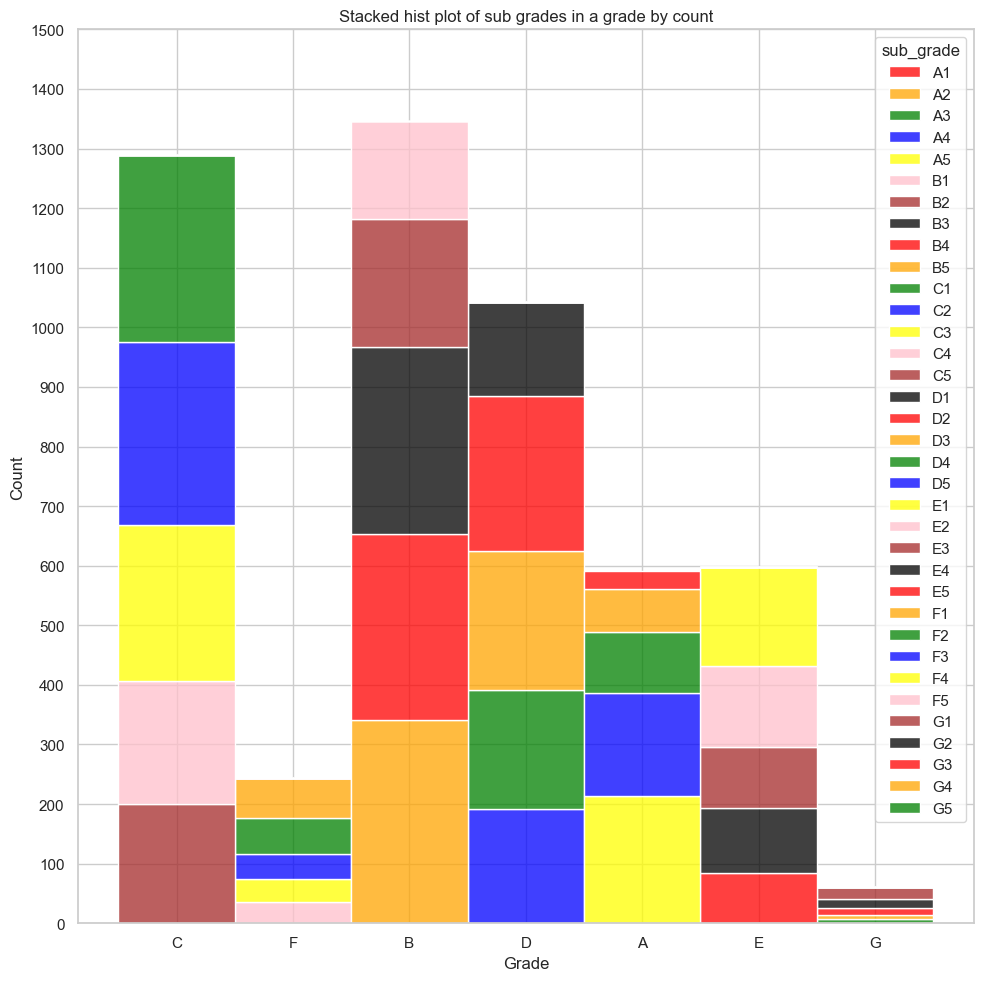

In [43]:
sub_grade_order = np.sort(df_charged_off_loans["sub_grade"].unique())

colr = ["Red", "Orange", "Green", "Blue", "Yellow","Pink", "Brown", "Black"]
plt.figure(figsize=(10, 10))
sns.histplot(df_charged_off_loans, x='grade', hue='sub_grade', stat='count', multiple='stack',hue_order=sub_grade_order, palette=colr)

# To display count - y-axis in multiples of 100
plt.yticks(np.arange(0, df_charged_off_loans['grade'].value_counts().max() + 200, 100))

# To display legend correctly
plt.tight_layout()

plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Stacked hist plot of sub grades in a grade by count')
plt.show()

From the above data, the B5,B4,C1 and C2 sub grade loans have more charged off loans.

In [44]:
# In order to analyze data on the complete cleaned data adding long group and annual income group which was done for charged off loans.
df["loan_grp"] = df['loan_amnt'].apply(find_loan_group)
df["annual_inc_grp"] = df['annual_inc'].apply(find_income_group)
df.shape

(36707, 55)

In [45]:
df["loan_status"].value_counts()

loan_status
Fully Paid     30593
Charged Off     5172
Current          942
Name: count, dtype: int64

Having different dataframes for different loan status to compare some data

In [46]:
## Dataframe for fullpaid loans
df_fully_paid_loans = df[df["loan_status"] == 'Fully Paid']
df_fully_paid_loans.shape

(30593, 55)

In [47]:
## Dataframe for current loans
df_current_loans = df[df["loan_status"] == 'Current']
df_current_loans.shape

(942, 55)

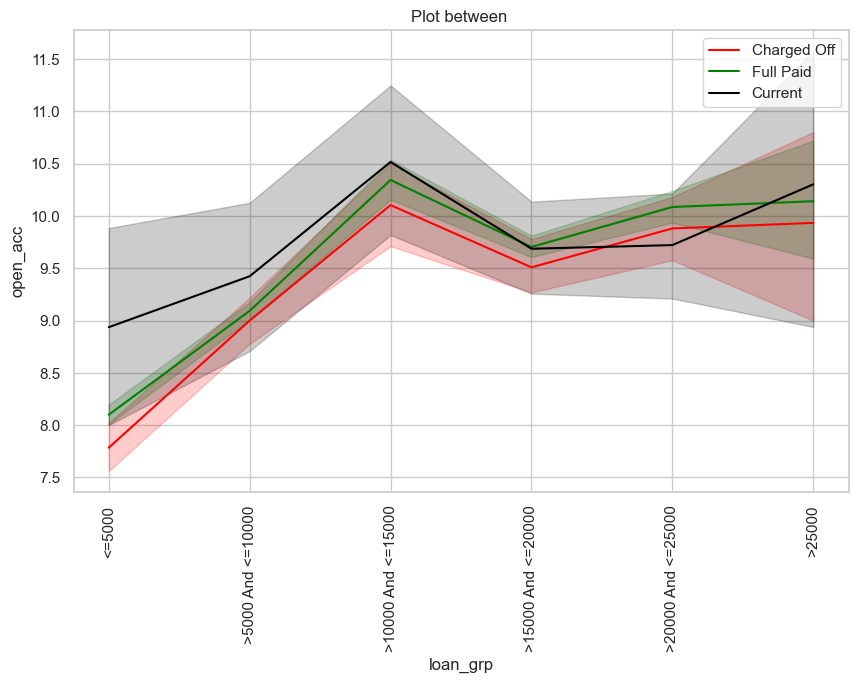

In [48]:
loan_grp_order = ["<=5000",">5000 And <=10000",">10000 And <=15000",">15000 And <=20000",">20000 And <=25000",">25000"]
plt.figure(figsize=(10, 6))


sns.lineplot(data=df_charged_off_loans, x='loan_grp', y='open_acc', label='Charged Off', color='red')
sns.lineplot(data=df_fully_paid_loans, x='loan_grp', y='open_acc', label='Full Paid', color='green')
sns.lineplot(data=df_current_loans, x='loan_grp', y='open_acc', label='Current', color='black')
# Plot the second DataFrame (subset)


# Adding labels and title and order xlabels
plt.xticks(ticks=range(len(loan_grp_order)), labels=loan_grp_order, rotation=90)
plt.xlabel('loan_grp')
plt.ylabel('open_acc')
plt.title('Plot between ')
plt.legend()

# Display the plot
plt.show()

Looking at the above graph and based on open accounts the current loans less than or equal to 15000 might default compared to charged off loans, but we have to support with other data and cannot rely on single column open account to draw conclusion.

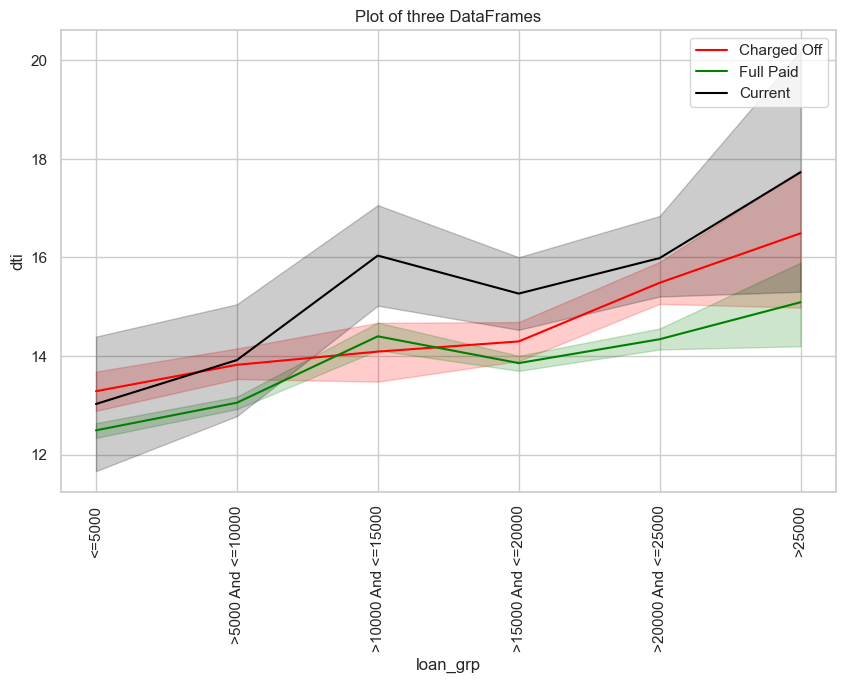

In [49]:

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_charged_off_loans, x='loan_grp', y='dti', label='Charged Off', color='red')
sns.lineplot(data=df_fully_paid_loans, x='loan_grp', y='dti', label='Full Paid', color='green')
sns.lineplot(data=df_current_loans, x='loan_grp', y='dti', label='Current', color='black')
# Plot the second DataFrame (subset)


# Adding labels and title and order xlabels
plt.xticks(ticks=range(len(loan_grp_order)), labels=loan_grp_order, rotation=90)
plt.xlabel('loan_grp')
plt.ylabel('dti')
plt.title('Plot of three DataFrames')
plt.legend()

# Display the plot
plt.show()

Looking at the above graph and based on DTI the current loans greater than 5000 have higher DTI compared to charged off loans and might default, but we have to support with other data like interest rate, employment length etc and cannot rely on single column DTI to draw conclusions.

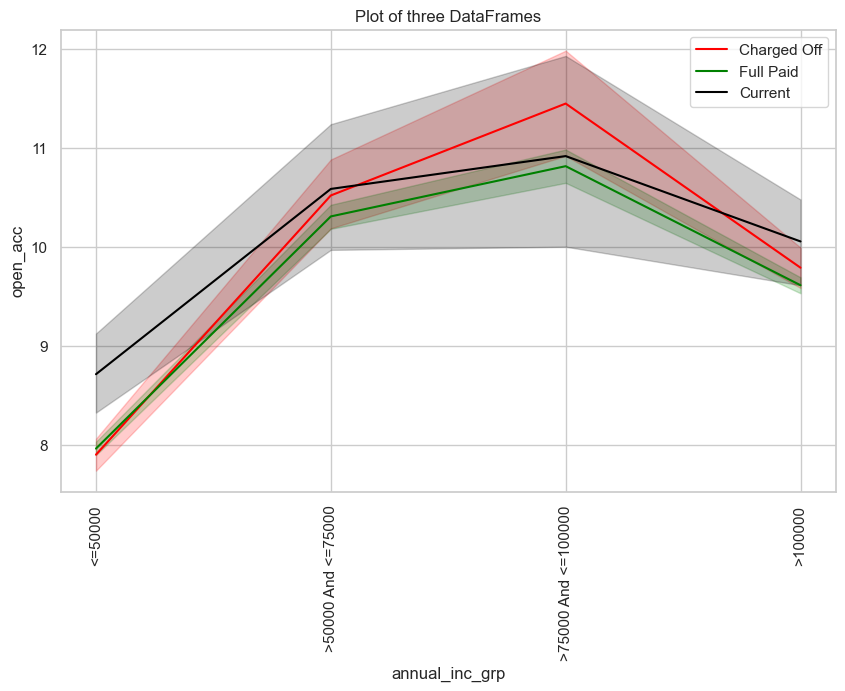

In [50]:
inc_grp_order = ["<=50000",">50000 And <=75000",">75000 And <=100000",">100000"]
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_charged_off_loans, x='annual_inc_grp', y='open_acc', label='Charged Off', color='red')
sns.lineplot(data=df_fully_paid_loans, x='annual_inc_grp', y='open_acc', label='Full Paid', color='green')
sns.lineplot(data=df_current_loans, x='annual_inc_grp', y='open_acc', label='Current', color='black')
# Plot the second DataFrame (subset)


# Adding labels and title and order xlabels
plt.xticks(ticks=range(len(inc_grp_order)), labels=inc_grp_order, rotation=90)
plt.xlabel('annual_inc_grp')
plt.ylabel('open_acc')
plt.title('Plot of three DataFrames')
plt.legend()

# Display the plot
plt.show()

Looking at the above graph and based on open account and annual income group, the current loans having anuual income greater than 50000 and less than or equal to 75000 have higher open accounts compared to charged off loans and hence they may default. But we have to support with other data like interest rate, employment length etc and cannot rely on single plot to draw conclusions.

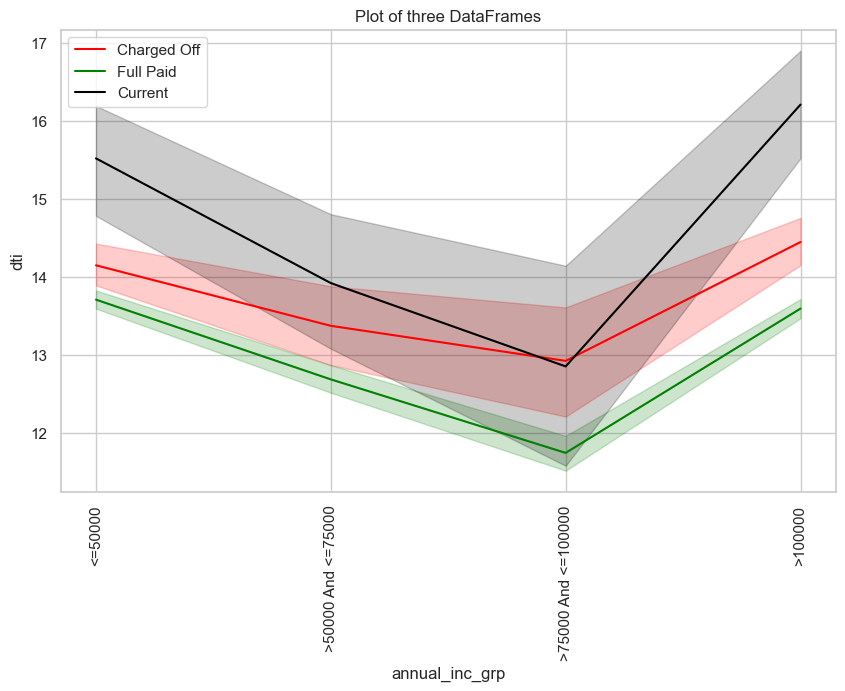

In [51]:
inc_grp_order = ["<=50000",">50000 And <=75000",">75000 And <=100000",">100000"]
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_charged_off_loans, x='annual_inc_grp', y='dti', label='Charged Off', color='red')
sns.lineplot(data=df_fully_paid_loans, x='annual_inc_grp', y='dti', label='Full Paid', color='green')
sns.lineplot(data=df_current_loans, x='annual_inc_grp', y='dti', label='Current', color='black')
# Plot the second DataFrame (subset)


# Adding labels and title and order xlabels
plt.xticks(ticks=range(len(inc_grp_order)), labels=inc_grp_order, rotation=90)
plt.xlabel('annual_inc_grp')
plt.ylabel('dti')
plt.title('Plot of three DataFrames')
plt.legend()

# Display the plot
plt.show()

From the above graph it looks the current loans might default when compared to charged off loans , but we cannot rely just based on annual income to state that and we need to analyze with other columns to come to conclusion.

emp_length   1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
loan_status                                                                   
Charged Off     436       1396      534      508      426      422      282   
Current          61        340       83       65       84       73       53   
Fully Paid     2563       7142     3510     3248     2708     2550     1741   

emp_length   7 years  8 years  9 years  < 1 year  
loan_status                                       
Charged Off      239      183      147       599  
Current           57       35       27        64  
Fully Paid      1362     1118      987      3664  


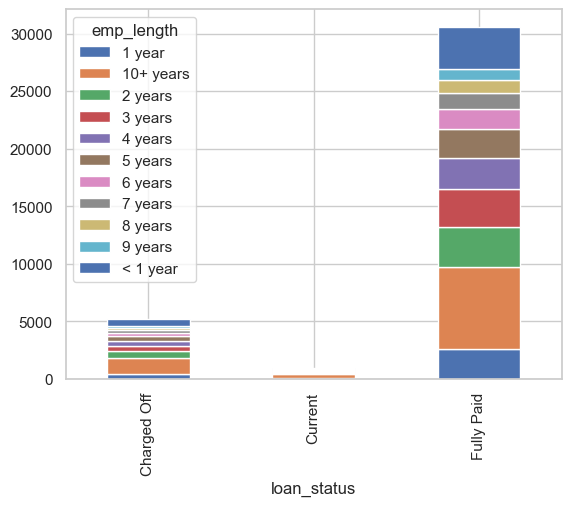

In [52]:
# Bi Variate Analysis
# Checking if employment length makes any difference to derive conclusion based on loan status
pv = pd.pivot_table(df, values = "grade" , index=["loan_status"], columns="emp_length", aggfunc = 'count')
print(pv)
#sns.heatmap(pv, annot=True, cmap="YlGnBu")
pv.plot(kind='bar', stacked=True)
plt.show()



In [53]:
# Bi Variate Analysis
pv = pd.pivot_table(df_charged_off_loans, values = "id" ,  columns="emp_length", aggfunc = 'count')
print(pv)


emp_length  1 year  10+ years  2 years  3 years  4 years  5 years  6 years  \
id             436       1396      534      508      426      422      282   

emp_length  7 years  8 years  9 years  < 1 year  
id              239      183      147       599  


([0, 1, 2, 3],
 [Text(0, 0, '(0, 6]'),
  Text(1, 0, '(6, 12]'),
  Text(2, 0, '(12, 18]'),
  Text(3, 0, '(18, 24]')])

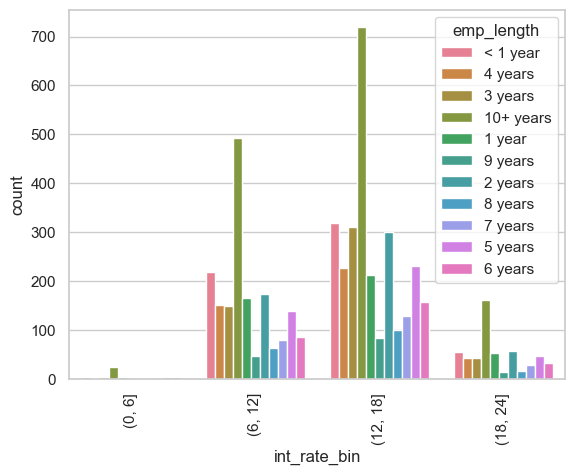

In [54]:
# Checking to say to if interest rate groups help to derive any conclusions.
sns.countplot(df_charged_off_loans, x = 'int_rate_bin', hue = "emp_length")
plt.xticks(rotation = 90)

## Multivariate Analysis

In [55]:
print("Charged Off Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti")
df_charged_off_loans.groupby("verification_status").agg({
    'int_rate': ['median', 'count'],
    'loan_amnt': ['median', 'count'],
    'annual_inc': ['median', 'count'],
    'dti': ['mean', 'count']
})

Charged Off Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti


int_rate       loan_amnt       annual_inc        \
                      median count    median count     median count   
verification_status                                                   
Not Verified           12.69  2089    7500.0  2089    48000.0  2089   
Source Verified        13.99  1336    8787.5  1336    48000.0  1336   
Verified               14.27  1747   15000.0  1747    56000.0  1747   

                           dti        
                          mean count  
verification_status                   
Not Verified         13.875682  2089  
Source Verified      13.069244  1336  
Verified             15.056669  1747

In [56]:
print("Fully Paid Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti")
df_fully_paid_loans.groupby("verification_status").agg({
    'int_rate': ['median', 'count'],
    'loan_amnt': ['median', 'count'],
    'annual_inc': ['median', 'count'],
    'dti': ['median', 'count']
})

Fully Paid Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti


int_rate        loan_amnt        annual_inc         \
                      median  count    median  count     median  count   
verification_status                                                      
Not Verified          10.990  14174    7200.0  14174    52000.0  14174   
Source Verified       11.490   7693    8000.0   7693    54000.0   7693   
Verified              12.195   8726   13000.0   8726    65000.0   8726   

                        dti         
                     median  count  
verification_status                 
Not Verified         13.035  14174  
Source Verified      12.830   7693  
Verified             14.540   8726

In [57]:
print("Current Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti")
df_current_loans.groupby("verification_status").agg({
    'int_rate': ['median', 'count'],
    'loan_amnt': ['median', 'count'],
    'annual_inc': ['median', 'count'],
    'dti': ['median', 'count']
})

Current Loans grouping by verification status and aggregating int rate, loan amount, annual amount , dti


int_rate       loan_amnt       annual_inc          dti  \
                      median count    median count     median count median   
verification_status                                                          
Not Verified           12.99   223   12000.0   223    53000.0   223  15.05   
Source Verified        14.65   267   12500.0   267    55000.0   267  12.62   
Verified               15.23   452   19850.0   452    61000.0   452  16.77   

                           
                    count  
verification_status        
Not Verified          223  
Source Verified       267  
Verified              452

To draw inference using loan status, verification status and employee length

In [58]:
df1 = df.groupby(["loan_status","verification_status","emp_length"]).agg({
    'int_rate': ['median', 'count'],
    'loan_amnt': ['median', 'count'],
    'annual_inc': ['median', 'count'],
    'dti': ['median', 'count']
})
#df1.to_excel("compare-with-index.xlsx", index = True)
#df1.to_csv("compare-without-index.csv", index = True)
df1

int_rate       loan_amnt        \
                                             median count    median count   
loan_status verification_status emp_length                                  
Charged Off Not Verified        1 year       12.835   204    7500.0   204   
                                10+ years    12.195   500    7350.0   500   
                                2 years      12.710   226    7000.0   226   
                                3 years      13.450   208    7800.0   208   
                                4 years      12.870   174    7337.5   174   
                                5 years      13.110   171    8000.0   171   
                                6 years      12.690   105    7750.0   105   
                                7 years      12.895    98   10000.0    98   
                                8 years      12.490    75    8000.0    75   
                                9 years      12.870    61    9800.0    61   
                                < 1 year     12.530   267    6825.0   267   
            Source Verified     1 year       13.295   116    8000.0   116   
                                10+ years    13.800   310   10000.0   310   
                                2 years      14.270   147    8000.0   147   
                                3 years      14.270   149    8000.0   149   
                                4 years      14.460   109    9000.0   109   
                                5 years      13.800   108    8000.0   108   
                                6 years      14.960    77   10000.0    77   
                                7 years      13.230    63    9600.0    63   
                                8 years      13.645    38   12000.0    38   
                                9 years      14.925    38    9800.0    38   
                                < 1 year     13.490   181    7000.0   181   
            Verified            1 year       14.050   116   14675.0   116   
                                10+ years    14.270   586   15850.0   586   
                                2 years      14.420   161   12375.0   161   
                                3 years      14.110   151   12000.0   151   
                                4 years      15.050   143   13000.0   143   
                                5 years      14.170   143   15000.0   143   
                                6 years      14.270   100   15125.0   100   
                                7 years      14.530    78   15000.0    78   
                                8 years      14.220    70   15000.0    70   
                                9 years      13.700    48   14750.0    48   
                                < 1 year     13.800   151   13750.0   151   
Current     Not Verified        1 year       13.490    20   12000.0    20   
                                10+ years    12.555    78   12000.0    78   
                                2 years      12.690    19   10000.0    19   
                                3 years      13.490    19   12000.0    19   
                                4 years      13.025    20   10937.5    20   
                                5 years      12.990    12   12000.0    12   
                                6 years      10.990    11   12000.0    11   
                                7 years      12.840    14   12000.0    14   
                                8 years      15.270    19   12000.0    19   
                                9 years      15.990     7   13000.0     7   
                                < 1 year     17.380     4    8362.5     4   
            Source Verified     1 year       15.990    23   12400.0    23   
                                10+ years    13.490    74   14000.0    74   
                                2 years      16.490    23   13650.0    23   
                                3 years      16.240    24   12000.0    24   
                                4 years      15.960    25   12000.0    25   
                                5 years

Checking if Loan to Income and debt to Income helps in drawing some conlusions.

count    36707.000000
mean         0.187926
std          0.113249
min          0.007375
25%          0.100000
50%          0.166667
75%          0.250000
max          0.830000
Name: loan_to_income, dtype: float64
Default Rate for Borrowers with Loan-to-Income Ratio > 40%:
loan_status
Fully Paid     0.681485
Charged Off    0.250000
Current        0.068515
Name: proportion, dtype: float64
count    36707.000000
mean        13.465411
std          6.670183
min          0.000000
25%          8.360000
50%         13.580000
75%         18.730000
max         29.990000
Name: dti, dtype: float64


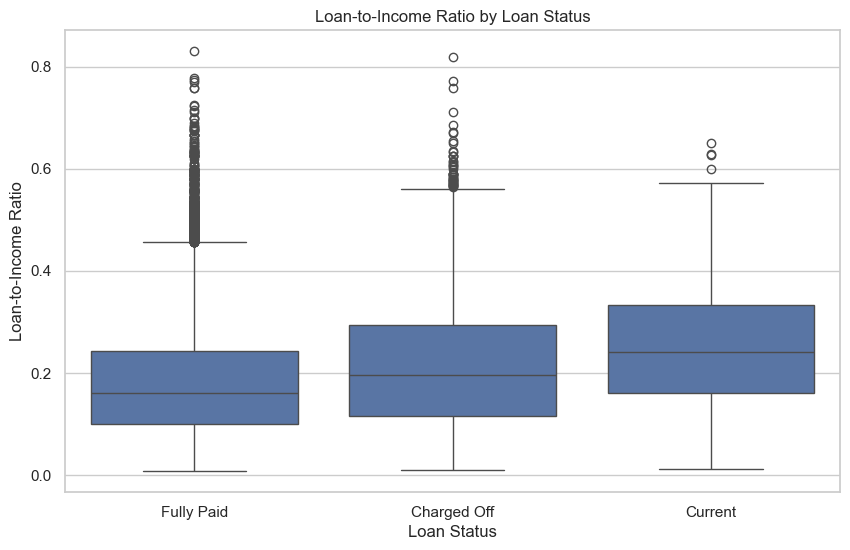

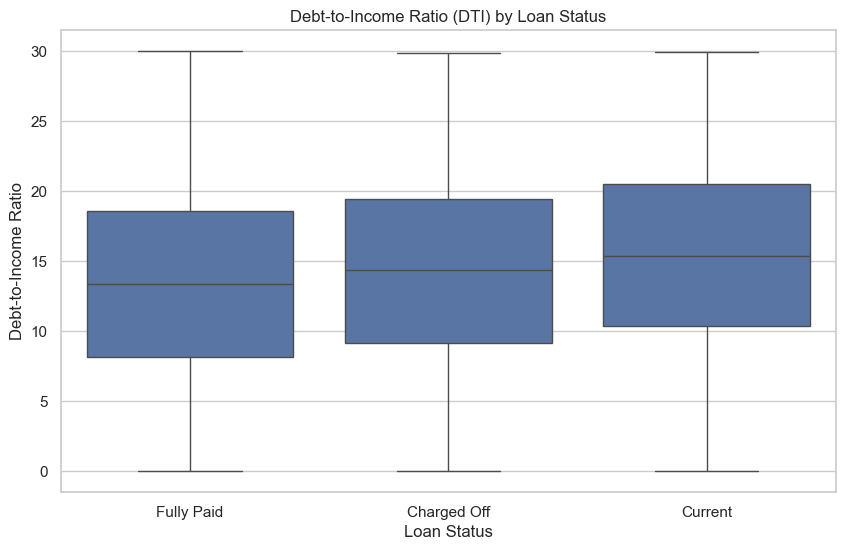

In [59]:

df['loan_to_income'] = df['loan_amnt'] / df['annual_inc']

# Check the distribution of Loan-to-Income Ratio
print(df['loan_to_income'].describe())

# Investigate borrowers with a Loan-to-Income Ratio above 0.4 (40%)
high_loan_to_income = df[df['loan_to_income'] > 0.4]

# Calculate default rate for high Loan-to-Income borrowers
default_rate_high_loan_to_income = high_loan_to_income['loan_status'].value_counts(normalize=True)

print("Default Rate for Borrowers with Loan-to-Income Ratio > 40%:")
print(default_rate_high_loan_to_income)

# Investigate Debt-to-Income Ratio (dti)
print(df['dti'].describe())


# Plotting Loan-to-Income Ratio segmented by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_to_income', data=df)
plt.title('Loan-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan-to-Income Ratio')
plt.show()

# Plotting DTI (Debt-to-Income Ratio) segmented by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('Debt-to-Income Ratio (DTI) by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

Analysis of Derived Metrics (Loan-to-Income Ratio and Debt-to-Income Ratio)